<a href="https://colab.research.google.com/github/Piyu02-12/Data_Science_Code/blob/main/SIMPLE_LINEAR_REGRESSION_Assignment4_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
dataset = pd.read_csv("/content/Salary_Data.csv")

In [ ]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA AND VISUALIZATION

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a8faccc90>]],
      dtype=object)

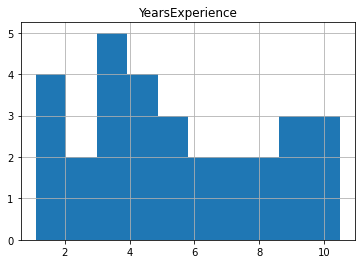

In [ ]:
dataset.hist("YearsExperience")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


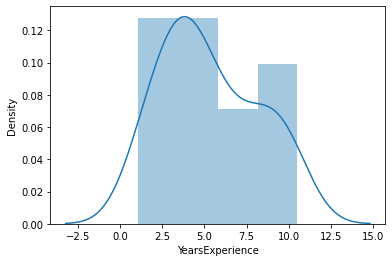

In [ ]:
sns.distplot(dataset['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


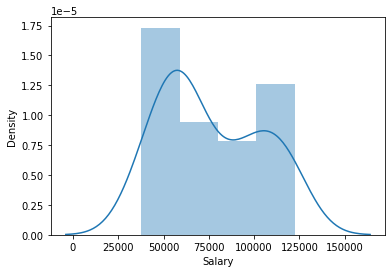

In [ ]:
sns.distplot(dataset['Salary'])

In [ ]:
dataset["log_salary"]=np.log(dataset["Salary"])

In [ ]:
dataset["log_YearsExperiance"]=np.log(dataset["YearsExperience"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


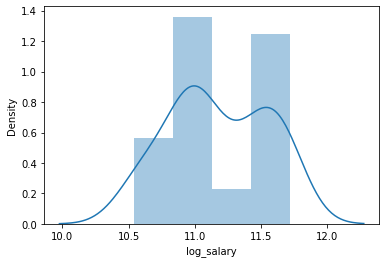

In [ ]:
sns.distplot(dataset["log_salary"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


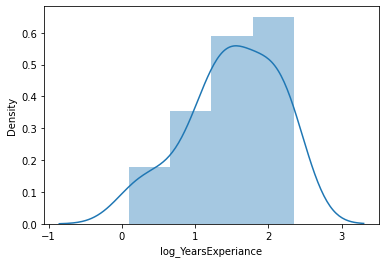

In [ ]:
sns.distplot(dataset["log_YearsExperiance"]) 

In [ ]:
dataset.head()

,YearsExperience,Salary,log_salary,log_YearsExperiance
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a87515890>]],
      dtype=object)

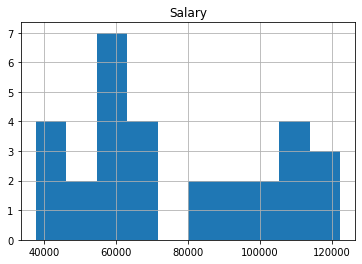

In [ ]:
dataset.hist("Salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a8743c550>]],
      dtype=object)

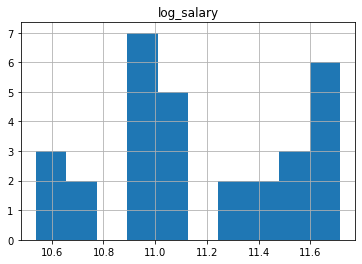

In [ ]:
dataset.hist("log_salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a87b87250>]],
      dtype=object)

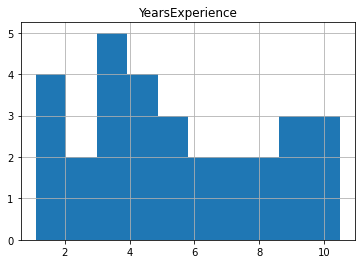

In [ ]:
dataset.hist("YearsExperience")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a87323f90>]],
      dtype=object)

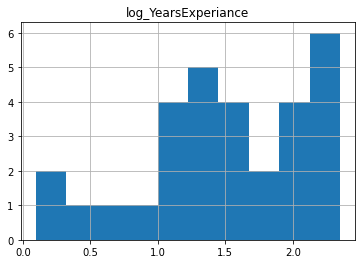

In [ ]:
dataset.hist("log_YearsExperiance")

# MODEL BUILDING

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsExperience      30 non-null     float64
 1   Salary               30 non-null     float64
 2   log_salary           30 non-null     float64
 3   log_YearsExperiance  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [ ]:
model = smf.ols("Salary ~ YearsExperience" , data=dataset).fit()  

In [ ]:
log_model=smf.ols("log_salary~log_YearsExperiance", data=dataset).fit()

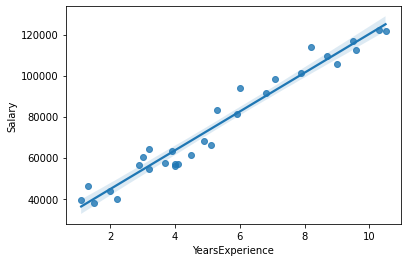

In [ ]:
sns.regplot(x='YearsExperience', y='Salary' , data = dataset  ) 

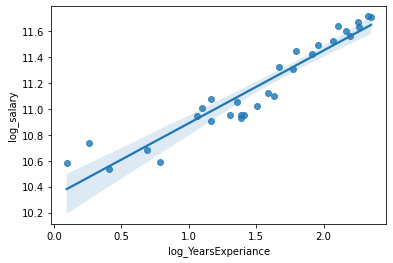

In [ ]:
sns.regplot(x='log_YearsExperiance', y='log_salary' , data = dataset  ) 

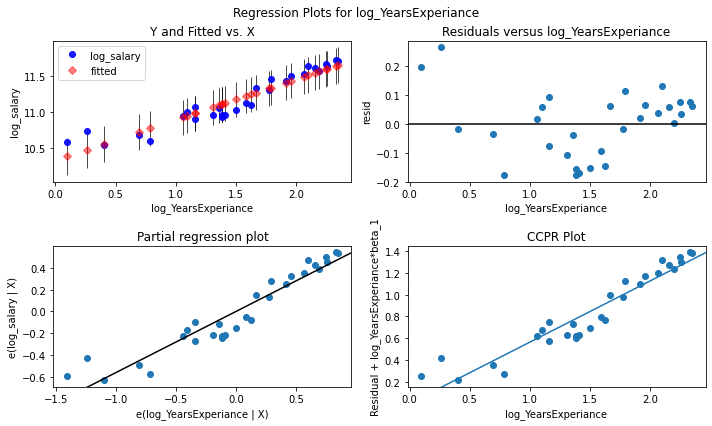

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(log_model,"log_YearsExperiance", fig=fig)

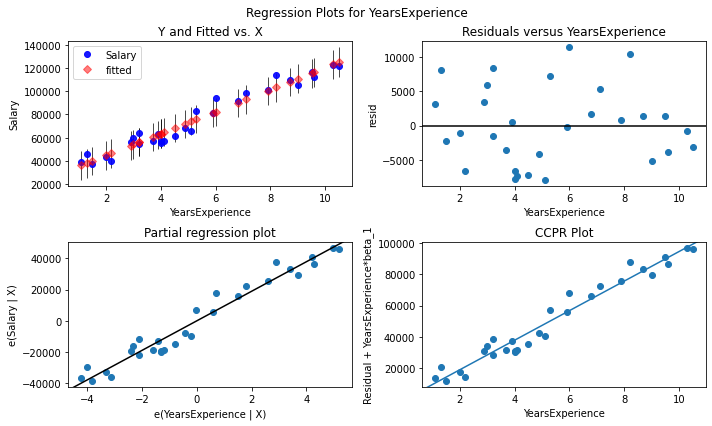

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(model,"YearsExperience", fig=fig) 

# MODEL TESTING

In [ ]:
#coefficient
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
log_model.params

Intercept              10.328043
log_YearsExperiance     0.562089
dtype: float64

In [ ]:
#t-value and p-value
print(model.tvalues , model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
Accuracy=log_model.rsquared
Accuracy

0.905215072581715

In [ ]:
Accuracy1=model.rsquared
Accuracy1

0.9569566641435086

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        17:37:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Rsquared value 
print(model.rsquared_adj , log_model.rsquared_adj) 

0.9554194021486339 0.9018298966024905


from the rsquared value we can say that the model is very good.

# MODEL PREDICTION

In [ ]:
newdata = pd.Series([2 , 5 ]) 

In [ ]:
newdata

0    2
1    5
dtype: int64

In [ ]:
data_pred = pd.DataFrame(newdata , columns = ['YearsExperience'])

In [ ]:
data_pred

,YearsExperience
0,2
1,5


In [ ]:
model.predict(data_pred)

0    44692.124842
1    73042.011806
dtype: float64